# Introduzione ai modelli matematici di diffusione epidemiologica
### Paolo Caressa, PhD
#### Versione aggiornata al 21 Marzo 2020

## 1. Premessa

Lo scopo di questi appunti è di fornire una rapida introduzione ai modelli deterministici della diffusione epidemica: si tratta delle nozioni più elementari, che presuppongono soltanto una conoscenza di base del calcolo differenziale, diciamo derivate in una variabile e opzionalmente integrali. Tuttavia spero che queste note diano una seppur fugace impressione dell'importanza dei metodi elementari dei sistemi dinamici (che veramente richiedono quattro derivate per essere espressi) ma anche dei loro limiti e della problematicità dell'applicarli a casi concreti e stimolino interesse scientifico nell'attuale congiuntura epidemica di cui tanto si (s)parla.

**Disclaimer:** Questi miei appunti sono stati scritti frettolosamente e potrebbero contenere errori e inesattezze, che prego di segnalare o correggere contribuendo al repository [https://www.github.com/pcaressa/note-epidemie](https://www.github.com/pcaressa/note-epidemie) sui quali li metto liberamente a disposizione. I programmi di simulazione sono stati scritti (in Python) non in modo ottimale ma per essere copiaincollati e modificati a piacimento, quindi risulteranno ai programmatori ineleganti e artigianali. Naturalmente non usateli per nessuna applicazione reale!!!

Inoltre, le note sono state scritte quando era disponibile una serie sicuramente meno numerosa di quella disponibile oggi nel repository dei dati dai quali attingo, quindi facendo rigirare i programmi nel foglio i risultati potrebbero essere diversi da quelli descritti nel testo:-)

## 2. Il modello più semplice: nessuna cura...

Consideriamo il diffondersi di un virus in una popolazione: quel che ci interessa è la diffusione dell'epidemia, e per farlo suddividiamo la popolazione in "compartimenti".

Nel modello più semplice abbiamo due compartimenti:

- $S$ (che sta per *Suscettibili*) cioè il gruppo di persone che non hanno la malattia ma possono contrarla.
- $I$ (che sta per *Infetti*) cioè il gruppo di persone che hanno contratto la malattia.

Quel che vogliamo capire è il passaggio $S\to I$, che comporta capire quanti suscettibili divengono infetti, e a che velocità. In questo modello supponiamo quindi che un suscettibile possa divenire infetto e, una volta contagiato, permanga nel compartimento $I$.

Supporremo che il numero totale di persone nella popolazione sia $N$ e rimanga costante, mentre ovviamente supponiamo che $S$ e $I$ varino nel tempo, dunque ad ogni istante $t$ abbiamo che $S(t)+I(t)=N$. Quel che vogliamo determinare è l'incremento $\Delta I(t) = I(t+\Delta t) - I(t)$ di persone che contraggono l'infezione fra l'istante $t$ e l'istante $t+\Delta t$. L'ipotesi che facciamo è che questo incremento soddisfi la relazione di proporzionalità

$$
    \Delta I(t) = \beta \frac{I(t)S(t)}{N}\,\Delta t
$$

dove $\beta>0$ è una costante che denota di quanto crescono gli infetti nell'intervallo di tempo $\Delta t$, precisamente è il *tasso di contatti* nella popolazione. Supponendo che le nostre variabili siano continue (anche se in realtà sono discrete in quanto rappresentano la numerosità di una popolazione), siamo quindi tentati di dedurne che

$$
    \frac{\Delta I(t)}{\Delta t} = \beta \frac{I(t)S(t)}{N}
$$

e quindi, passando al limite per $\Delta t\to 0$, trovare la relazione differenziale

$$
    \frac{dI}{dt} = \beta \frac{IS}{N}
$$

Stante l'ipotesi che $N$ sia costante nel tempo, da cui $S(t)=N-I(t)$, possiamo anche scrivere l'equazione per la dinamica di $S$:

$$
    \frac{dS}{dt} = - \frac{dI}{dt} = -\frac\beta N IS
$$

A ben vedere queste due equazioni sono equivalenti all'unica equazione

$$
    I'(t) = \beta \frac{I(N-I)}{N}
$$

(Spesso si scrive $I'(t)$ per indicare la derivata $\frac{dI}{dt}$ di una funzione $I(t)$.)

Notiamo immediatamente che questa equazione esprime il fatto che la derivata di $I(t)$ è positiva (poiché lo è la costante $\beta$ e poiché lo sono gli altri termini che compaiono a secondo membro dell'equazione differenziale), e quindi ci aspettiamo che gli infettati crescano di continuo, fino a saturare l'intera popolazione, e svuotare il compartimento $S$ (a quel punto $I(N-I)=0$ e quindi avremmo da un certo istante in poi $I'=0$, cioè $I=N$ in modo costante).

Verifichiamo analiticamente e numericamente questa triste deduzione.


### Integrazione esatta del modello **SI**

Poiché la soluzione di questa equazione differenziale si può scrivere in modo esatto, facciamolo (non capita quasi mai!): questa parte è puramente matematica ma comunque esorto tutti a provare a leggerla in quanto ci consentirà di guardare "in faccia" la soluzione del nostro modello, cioè la funzione $I(t)$ che indica l'andamento degli infettati.

L'equazione che abbiamo ricavato, $I'=\beta I(N-I)/N$, ha la caratteristica che le variabili che vi figurano sono separabili, per cui possiamo portare tutti termini che contengono la $I$ da una parte lasciando quelli che contengono la $t$ dall'altra, integrando poi ambo i membri come (scrivo $I_0=I(t_0)$ e $I_1=I(t_1)$)

$$
    \int_{I_0}^{I_1} \frac{N}{I(N-I)}dI = \beta \int_{t_0}^{t_1} dt = \beta(t_1 - t_0)
$$

L'integrazione del primo membro di questa equazione è facile (uso la sostituzione $J=N-I$ da cui $dJ=-dI$):

\begin{align*}
    \int_{I_0}^{I_1} \frac{N}{I(N-I)}dI
        &= \int_{I_0}^{I_1} \frac{dI}{I} + \int_{I_0}^{I_1} \frac{dI}{N-I}
            = \int_{I_0}^{I_1} \frac{dI}{I} - \int_{N-I_0}^{N-I_1} \frac{dJ}{J}   \\
        &= \log\frac{I_1}{I_0} - \log\frac{N-I_1}{N-I_0}
            = \log\frac{I_1(N-I_0)}{I_0(N-I_1)}
\end{align*}

Pertanto abbiamo

$$
    e^{\beta(t_1-t_0)} = \frac{I_1(N-I_0)}{I_0(N-I_1)}
$$

da cui segue $I_0(N-I_1)e^{\beta(t_1-t_0)} = I_1(N-I_0)$, quindi $I_0Ne^{\beta(t_1-t_0)}=I_1(N-I_0+I_0e^{\beta(t_1-t_0)})$, il che ci consente di scrivere esplicitamente $I_1$:

$$
    I_1 = \frac{I_0Ne^{\beta(t_1-t_0)}}{N-I_0+I_0e^{\beta(t_1-t_0)}}
        = \frac{I_0N}{S_0e^{-\beta(t_1-t_0)}+I_0}
$$

rammentando che $S=I-N$.

Abbiamo quindi trovato una espressione esplicita per l'andamento degli infetti per ogni $t$,

$$
    I(t) = \frac{I_0N}{(N-I_0)e^{-\beta(t-t_0)}+I_0}
$$

che dipende da una serie di costanti: $I_0$ è il valore iniziale di $I$ mentre $\beta$ è una costante che dipende dalla malattia.

Proviamo a graficare questa funzione per alcuni valori di $\beta$, supponendo che la condizione iniziale, su una popolazione di $N=1000$ sia di $I_0=10$ infetti. Ecco un programmino Python che svolge questo compito.

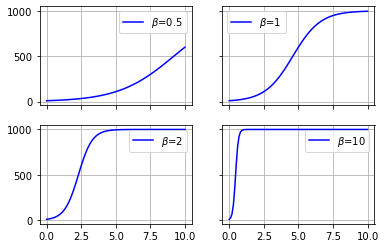

In [75]:
# Importiamo un po' di librerie che useremo qui e in seguito
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Dati del modello
N = 1000
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 100)   # questo genera 100 valori fra t0 e t1

# Condizione iniziale = numero di infetti all'istante iniziale
I0 = 10

def grafico(handle, beta):
    y = [I0*N/((N-I0)*np.exp(-beta*(tt-t0))+I0) for tt in t]
    handle.plot(t, y, 'b', label=r'$\beta$=' + str(beta))
    handle.grid()
    handle.legend(loc='best')

# Imposta le aree per i 4 grafici e chiama la funzione che li disegna
# con vari valori dei parametri
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')

grafico(axes[0,0], beta = 0.5)
grafico(axes[0,1], beta = 1)
grafico(axes[1,0], beta = 2)
grafico(axes[1,1], beta = 10)


Come si vede, in ogni caso il numero degli infetti tende a crescere fino a saturare tutta la popolazione: il parametro $\beta$ agisce come un tasso di crescita, nel senso che maggiore è il suo valore e più in fretta la popolazione degli infetti tende a saturare l'intera popolazione.

Potete divertirvi a variare la condizione iniziale e $\beta$, ma alla fine il risultato sarà sempre quello.

### Integrazione numerica del modello **SI**

Il calcolo che abbiamo fatto nell'integrazione esatta è semplice e divertente: purtroppo so che qualcuno potrebbe opinare su questi giudizi, e anche in vista di esempi più complicati, mi sento quindi obbligato a fornire anche una integrazione dell'equazione differenziale con metodi numerici, cioè non basandoci sulle nostre magie algebriche simboliche ma lasciando fare al computer quello per cui è fatto, cioè i conti approssimati della soluzione del modello.

Si tratta di usare il solutore di equazioni differenziali ordinarie di Python e dargli in pasto direttamente la funzione che figura a secondo membro nell'equazione differenziale: ricordiamo che il modello **SI** è

$$
    I'(t) = \beta \frac{I(N-I)}{N}
$$

Quindi è del tipo $y' = f(t,y)$ (nel nostro caso $y=I$). Ecco un programmino che usa questo metodo, il quale non ci fornisce esplicitamente la funzione $I$ che cerchiamo, ma ce la calcola nei punti desiderati, che in fondo è tutto quel che ci serve.


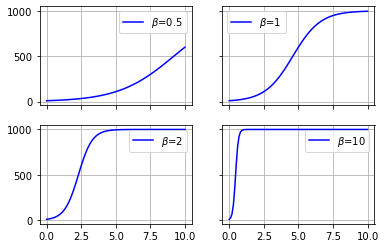

In [76]:
# Importiamo un po' di librerie che useremo qui e in seguito
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 100)

# Condizione iniziale = numero di infetti all'istante iniziale
I0 = 10

def f(y,t, beta, N):
    return beta * y *(N - y)/N

def grafico(handle, beta):
    y = odeint(f, I0, t, args=(beta,N))    # risolve l'equazione differenziale
    handle.plot(t, y, 'b', label=r'$\beta$=' + str(beta))
    handle.grid()
    handle.legend(loc='best')

# Imposta le aree per i 4 grafici e chiama la funzione che li disegna
# con vari valori dei parametri
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')
grafico(axes[0,0], beta = 0.5)
grafico(axes[0,1], beta = 1)
grafico(axes[1,0], beta = 2)
grafico(axes[1,1], beta = 10)


Non è sorprendente che sia venuto lo stesso risultato precedente: l'integrazione numerica non è esatta ma nella pratica del calcolo scientifico fornisce gli stessi risultati di quella esatta (nella rappresentazione dei numeri all'interno dei computer non c'è nulla di realmente esatto...).

## Il modello **SIS**

I risultati del modello **SI** non sembrano molto incoraggianti, ma è chiaro che il modello è troppo semplificato rispetto alle epidemie reali, dato che la dinamica del modello prevede solo la possibilità di passare dal compartimento $S$ al compartimento $I$.

Nella realtà i malati possono anche guarire (per fortuna!), col che tornerebbero nel compartimento $S$: dunque un modello un pochino più sofisticato è dato dallo schema

$$
    S \to I \to S
$$

Questo passo ulteriore ignora alcune caratteristiche delle malattie infettive, cioè che ci si può immunizzare da esse o anche morire di esse, vedremo nella prossima sezione come includere anche queste caratteristiche nei nostri modelli, per ora continuiamo a fare un passo per volta.

Naturalmente in questo modello **SIS** le equazioni si complicano, per tenere conto anche della transizione $I\to S$, da infetto a suscettibile: in particolare, se nel modello **SI** l'equazione che descrive il tasso con cui cresce il comparimento degli infetti è

$$
    I'(t) = \beta \frac{I(N-I)}{N}
$$

nel modello **SIS** questo tasso di crescita viene frenato da una certa quota di infetti che tornano suscettibili, secondo un tasso di decrescita proporzionale a $I$ mercé un nuovo parametro $\gamma$:

$$
    I'(t) = \beta \frac{I(N-I)}{N} - \gamma I
$$

Questo parametro $\gamma$ si interpreta immaginando che $1/\gamma$ sia il tempo medio di durata dell'infezione in un individuo.

Dal punto di vista del compartimento dei suscettibili, l'equazione precedente diviene

$$
    S'(t) = -\beta\frac{S(N-S)}{N} +\gamma(N-S)
$$

E infatti ci torna: stiamo infatti dicendo che, ad ogni istante $t$, $S$ si decrementa per la percentuale di soggetti che passano dal compartimento $S$ al compartimento $I$, ma si incrementa per la percentuale dei soggetti che da $I$ tornano in $S$, e lo fanno con un tasso di incremento dato da $\gamma$.

Notiamo inoltre che, sommando queste equazioni, troviamo $I'+S' = 0$, cioè che $I+S$ è costante, cosa che supponevamo nel modello **SI**.

L'equazione per la dinamica della $I$ è ancora a variabili separabili e se qualcuno vuole divertirsi a dedurla come abbiamo fatto in precedenza gli dò il suggerimento di distinguere il caso $\beta=\gamma$ dal caso $\beta\neq\gamma$, poiché danno luogo ad equazioni diverse.

Qui cedo alla pigrizia e faccio fare il conto al computer: nei seguenti programmini Python mostro le curve relative alla soluzione $I(t)$ del modello **SIS** per diversi valori e combinazioni di $\beta$ e $\gamma$, pensando sempre a una popolazione di $N=1000$ persone con un numero iniziale di infetti $I_0=100$ (naturalmente cambiando i dati del programma si possono sperimentare le curve per altri valori, il motivo principale per cui queste note sono redatte in un foglio Jupyter è proprio dare a chi le legge la possibilità di giocare con i modelli).

Nei grafici indichiamo i valori del rapporto

$$
    \sigma = \frac{\beta}{\gamma}
$$


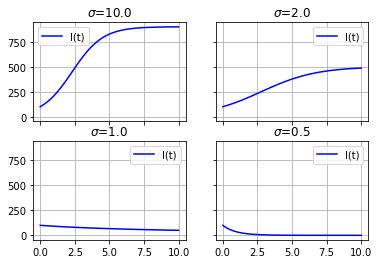

In [77]:
# Importiamo un po' di librerie che useremo qui e in seguito
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 100)

# Condizione iniziale = numero di infetti all'istante iniziale
I0 = 100

def f(y,t, beta, gamma, N):
    return beta * y *(N - y)/N - gamma * y

def grafico(handle, beta, gamma):
    y = odeint(f, I0, t, args=(beta,gamma,N))
    handle.plot(t, y[:,0], 'b', label="I(t)")
    handle.grid()
    handle.set_title(r'$\sigma$=' + str(beta/gamma))
    handle.legend(loc='best')

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')
grafico(axes[0,0], beta = 1, gamma = 0.1)
grafico(axes[0,1], beta = 1, gamma = 0.5)
grafico(axes[1,0], beta = 1, gamma = 1)
grafico(axes[1,1], beta = 1, gamma = 2)


Come si vede il numero degli infetti non tende necessariamente al numero totale della popolazione: in particolare, se $\sigma\leq 1$ il numero degli infetti decresce sempre di più, e in un tempo sufficientemente lungo si azzera.

Invece, se $\sigma>1$ il numero degli infetti cresce con un andamento simile a quello del modello SIS ma con l'importante differenza di non tendere a saturare tutta la popolazione, ma di assestarsi su un numero massimo di infetti che è percentualmente dato da $I_E = (\sigma-1)/\sigma$, e che si chiama *equilibrio endemico*: una volta raggiunto l'equilibrio endemico, il compartimento degli infetti si stabilizza e l'epidemia diviene una *endemia*, durevole nel tempo.

Per esempio, se $\sigma=2$ allora l'equilibrio endemico è raggiunto per un numero di infetti pari a $N\times I_E=N/2$. E infatti si vede dal grafico corrispondente che la curva raggiunge questo punto.

Per avere una idea della *asintoticità* di questo valore limite, ripetiamo il calcolo allungando smisuratamente i tempi:

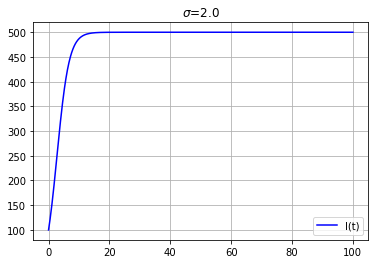

In [78]:
t0 = 0
t1 = 100
t = np.linspace(t0, t1, 1000)
fig, axes = plt.subplots(1, 1)
grafico(axes, beta = 1, gamma = 0.5)

Vediamo bene come l'equilibrio endemico costituisca una soglia che non è possibile superare. Per questo motivo la proprietà che stabilisce il comportamento asintotico del modello sulla base della soglia si suole chiamare **teorema della soglia critica**; nel caso del modello **SIS** è quello che abbiamo enunciato più sopra discutendo i casi $\sigma\leq1$ e $\sigma>1$.

PS: possiamo facilmente modificare il programmino per mostrare una animazione al variare di $\beta$: il risultato viene salvato in una gif animata...

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


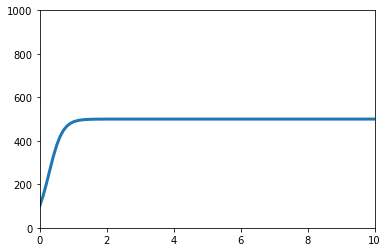

In [79]:
# Importiamo un po' di librerie che useremo qui e in seguito
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#plt.style.use('seaborn-pastel')
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 100)

# Condizione iniziale = numero di infetti all'istante iniziale
I0 = 100

def f(y,t, beta, gamma, N):
    return beta * y *(N - y)/N - gamma * y

fig = plt.figure()
ax = plt.axes(xlim=(t0, t1), ylim=(0, N))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global beta
    y = odeint(f, I0, t, args=(beta,gamma,N))
    line.set_data(t, y)
    beta += 0.1
    return line,

beta = 0.1
gamma = 5
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=1, blit=True)
anim.save('SIS.gif', writer='imagemagick')
anim


## Il modello **SIR**

Il modello **SIS** ha un che di ragionevole, ma anche di rassegnatamente drammatico: l'epidemia diviene una *endemia* (cioè il suo radicamento temporale si fa paragonabile alla vita degli individui: i modelli per le endemie utilizzano solitamente anche dei parametri che tengono conto di nascite e morti nella popolazione durante il tempo di diffusione della malattia).

Tuttavia è ragionevole supporre che il numero degli infetti diminuisca non solo perché alcuni di loro tornano nei suscettibili, ma anche per altri motivi: in generale questo accade per tutte le epidemie. Gli infetti possono guarire e sviluppare una immunità, dunque non essere più suscettibili di contrarre la malattia, o morire, o essere isolati.

Viene quindi spontaneo modificare il nostro modello introducendo un nuovo compartimento, $R$ (che sta per *rimossi*) e contiene gli infetti che non sono più tali ma nemmeno più suscettibili. Lo schema di questo modello **SIR** contempla che si possa passare nel compartimento $R$ solo se si proviene dal compartimento $I$:

$$
    S \to I \to R
$$

(Questa tipologia di modelli fu proposta da Kermack e McKendrick in una serie di classici lavori fra il 1927 e il 1933.)

In sostanza si tratta di aggiungere una equazione per la dinamica del passaggio $I\to R$, il che conduce ad ampliare le equazioni del modello **SI** come segue:

$$
\begin{cases}
\displaystyle
    S' = -\beta\frac{IS}{N}   \\
\displaystyle
    I' = \beta \frac{IS}{N} -\gamma I  \\
\displaystyle
    R' = \gamma I
\end{cases}
$$

Infatti stiamo dicendo che la quota $\gamma I$ che viene sottratta dal compartimento $I$ a ogni $\Delta t$ passa nel compartimento $R$, che quindi si incrementa di $\gamma I\Delta t$.

Notiamo che stavolta $N=S+I+R$ e che, sommando le tre equazioni differenziali, troviamo $S'+I'+R'=0$, dunque di nuovo $N$ costante. In particolare possiamo sempre determinare $R(t)$ una volta che siano note $S(t)$ e $I(t)$, quindi possiamo limitarci a studiare le prime due equazioni per avere la dinamica dei tre compartimenti.

Quel che viene fuori è che anche in questo caso quel che governa è la costante $\sigma = \beta/\gamma$, e che il teorema della soglia critica per il modello **SIR** afferma quanto segue.

- Se $\sigma\leq1$ allora $I(t)$ decresce indefinitamente.
- Se $\sigma>1$ e $S_0 \leq N/\sigma$ allora $I(t)$ decresce indefinitamente.
- Se $\sigma>1$ e $S_0 > N/\sigma$ allora $I$ cresce fino a un certo istante $T$ e poi decresce indefinitamente.

Come si vede è interessante l'ultima: c'è un tempo $T$ corrispondente al **picco dell'epidemia**, il punto di massimo della funzione $I(t)$...

Una spiegazione intuitiva è la seguente: il massimo di una funzione si ha in corrispondenza di dove si annulla la sua derivata, e dato che la derivata di $I(t)$ è il secondo membro dell'equazione differenziale $I'(t)=\beta SI/N -\gamma I$, troviamo che il punto di massimo di $I$ si ha per l'istante $T$ tale che $S(T) = N\gamma/\beta = N/\sigma$.

Ora, se $\sigma\leq 1$ $I(t)$ decresce sicuramente, altrimenti cresce: ma se $S_0\leq N/\sigma$, dato che inizialmente $S$ decresce (in quanto cresce $I$), $I$ non potrà assumere il suo massimo, e quindi decrescerà indefinitamente. Se invece all'istante $t_0$ si ha che $S_0>N/\sigma$, al crescere di $I(t)$ si avrà un decrescere di $S(t)$ che, supponendola continua, prima o poi dovrà toccare il valore soglia di $N/\sigma$ e quindi far giungere $I(t)$ al suo massimo: da lì in poi, $I(t)$ non può che decrescere.

Una illustrazione di questo risultato è data dal seguente programmino, che risolve il sistema di equazioni differenziali in $S$ e $I$, e deduce i valori di $R$ come $N-S-I$.


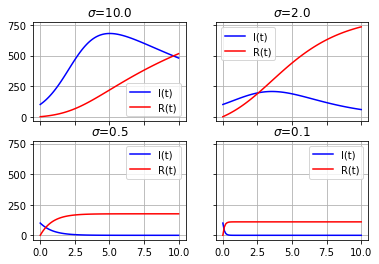

In [80]:
# Importiamo un po' di librerie che useremo qui e in seguito
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 100)

# Condizione iniziale = numero di infetti all'istante iniziale
S0 = 900
I0 = 100

def f(y,t, beta, gamma, N):
    return [-beta * y[0] *y[1]/N, beta * y[0] *y[1]/N - gamma * y[1]] 

def grafico(handle, beta, gamma):
    y = odeint(f, [S0,I0], t, args=(beta,gamma,N))
    handle.plot(t, y[:,1], 'b', label="I(t)")
    handle.plot(t, N - y[:,0] - y[:,1], 'r', label="R(t)")
    handle.grid()
    handle.legend(loc='best')
    handle.set_title(r'$\sigma$=' + str(beta/gamma))

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')
grafico(axes[0,0], beta = 1, gamma = 0.1)
grafico(axes[0,1], beta = 1, gamma = 0.5)
grafico(axes[1,0], beta = 1, gamma = 2)
grafico(axes[1,1], beta = 1, gamma = 10)


Si vede chiaramente nei grafici più in alto che se $\sigma>1$ la funzione $I(t)$ cresce fino a un certo tempo $T$ e poi decresce. Facendo un conto non troppo complicato, si trova che

$$
    I(T) = I_0 - \frac{N}{\sigma}\left(1+\log\frac{\sigma S_0}{N}\right)
$$

(Si supponga che $I=F(S(t))$ per una certa funzione $F$: derivando questa definizione e usando le due equazioni differenziali come definizioni di $S'(t)$ e $I'(t)$, si giunge all'equazione precedente, tenendo conto che $S(T)=N/\sigma$.)

Ultima osservazione: la $\sigma$ nel modello **SIR** corrisponde al famoso coefficiente $R_0$ di cui ogni tanto si leggono stime e al quale si attribuisce molta importanza, giustificata dal teorema della soglia critica.

## Ulteriori modelli
Il modello **SIR** sembra più realistico dei precedenti in quanto contempla la possibilità che dalla malattia si guarisca, si muoia o ci si immunizzi. E non propone invariabilmente uno scenario apocalittico di endemia.

Prima di applicare questo modello a dei calcoli concreti, vale la pena di aggiungere che fin qui abbiamo scalfito la punta dell'iceberg: infatti esistono due modi di generalizzare questo modello.

1. Aggiungere ulteriori compartimenti, come per esempio gli *esposti*, cioè chi ha contratto la malattia ma non è ancora contagioso, se non dopo un periodo di latenza. Quindi il modello diviene $S\to E\to I\to R$. Un altro compartimento si ha introducendo il compartimento $M$ dei neonati che hanno una immunità temporanea, che può durare qualche mese, indotta dagli anticorpi della madre: in questo caso il modello diviene $M\to S\to E\to I\to R$. Naturalmente a ogni compartimento si aggiunge una equazione differenziale e un parametro, quindi le cose tendono a farsi "multidimensionali" e complicate, tant'é che non credo sia noto nessun teorema di soglia critica per il modello **MSEIR**.

2. Estendere il modello epidemico a un modello endemico che tenga conto di nascite e morti durante l'evoluzione del contagio: in questo caso non si aggiungono altre equazioni ma altri parametri. Per esempio **MSEIR** è inerentemente endemico, considerando anche i neonati.

Per chi fosse interessato ad approfondire queste tematiche alla fine di questa nota ho inserito alcuni suggerimenti bibliografici.


## Facciamo lavorare i modelli

Per quelli come me che trovano piacere estetico nella manipolazione di formule e nella deduzione dei teoremi, quanto ho scritto in queste note basta per solleticare qualche neurone. Ma, specie a fronte dell'attuale emergenza da Covid 19, non posso chiudere questi appunti senza tentare una simulazione usando dati reali.

Tengo a sottolineare come questo sia un semplice esercizio per mostrare l'uso di un modello, non una proposta di predizione. Userò il modello **SIR**, il che vuol dire che dobbiamo prendere i dati di una epidemia e in particolare, per ciascun istante, il totale dei suscettibili, degli infetti e dei rimossi.

E ora vengono i problemi: qualcuno ha efficacemente detto che *viviamo in una stitichezza di informazioni ma sommersi da una diarrea di dati*. Girando in rete si trovano moltissimi dati su questa influenza, e tanti grafici basati su modelli con le quattro operazioni (numero di morti nell'unità di tempo, rapporto fra eposti e infetti, etc.). Ma ho fatto fatica a trovare i dati utili per il modello.

### Un dataset e come utilizzarlo

Ai miei fini servono compartimenti misurati, quindi userò come popolazione totale quella dei sottoposti a un controllo di presenza del virus (anche se questo dato è drogato dal fatto che normalmente si considerano i sintomatici per fare i controlli). Gli infetti sono quelli risultati positivi. I rimossi sono sia i morti sia chi è guarito, supponendo (cosa non completamente vera a quanto pare) che un rimosso non possa tornare suscettibile.

Nei dataset normalmente si elencano per paese i casi positivi, senza indicare rispetto a che campione della popolazione, un dato ai nostri fini inutile.

Comunque su GitHub ci sono alcuni repository con dati che fanno al caso nostro: in particolare ne ho trovato uno della Protezione Civile Italiana, che consiglio a tutti quelli che vogliano attingere ai dati sul Covid19 in Italia, e precisamente al repository [https://github.com/pcm-dpc/COVID-19](https://github.com/pcm-dpc/COVID-19) gestito da Umberto Rosini. In particolare troviamo una serie storica in formato JSON, che ho copiaincollato alla data in cui sto scrivendo queste righe nello script qui di seguito, che la memorizza in una variabile DATA:

In [81]:
import git
import json
import os
import shutil
import tempfile

tempdir = tempfile.mkdtemp()
repo = git.Repo.clone_from('https://github.com/pcm-dpc/COVID-19', tempdir, branch='master', depth=1)
with open(os.path.join(tempdir, 'dati-json','dpc-covid19-ita-andamento-nazionale.json')) as f:
    DATA = json.load(f)
try:
    shutil.rmtree(tempdir)
except:
    # potrebbero esserci problemi di permessi... alla peggio la cartella viene cancellata dall'OS
    pass

Ai miei fini i dati che mi interessano sono i valori di $I$ e $R$, che posso estrarre come

1. $I(t)$ è dato dal valore del campo "totale_attualmente positivi";
2. $R(t)$ è dato dalla somma dei valori dei campi "dimessi_guariti" e "deceduti"
3. $N$ è dato dal valore del campo "tamponi".

Rispetto ai nostri modelli notiamo come il valore $N$ sia tutto meno che costante: un modo di ovviare a questo inconveniente è prendere il valore più recente (e quindi più alto) e usarlo come $N$ anche per tutti gli istanti precedenti.

Proviamo questa prima soluzione.

beta ottimale = 0.2730412417541209
gamma ottimale = 0.049592824254607766
sigma ottimale = 5.505660261499467


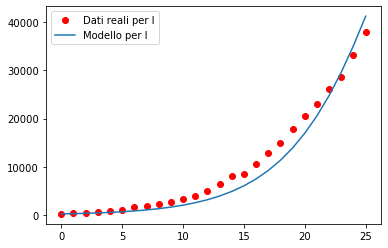

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fmin

# La funzione seguente torna un array con le curve S, I e R calcolate nei punti
# dell'intervallo, a partire dalle serie storiche e su beta e gamma ottimizzati
def SIR(N0, serie_I, serie_R, intervallo, verbose=True):
    serie_S = N0 - serie_I - serie_R
    serie_SIR = np.array([[serie_S[i], serie_I[i], serie_R[i]] for i in range(len(serie_I))])
    SIR0 = serie_SIR[0]

    # Calibriamo per t0 = 0, t1 = lunghezza serie - 1
    intervallo_dati = np.arange(len(serie_I))

    def fun_SIR(y, t, beta, gamma):
        # y = [S(t), I(t), R(t)]
        return [-beta*y[0]*y[1]/N0,
                beta*y[0]*y[1]/N0-gamma*y[1],
                gamma*y[1] ]

    def modello(parametri):
        # Risolve il sistema di equazioni $S'=..., I'=..., R'=...$
        y = odeint(fun_SIR, SIR0, intervallo_dati, args=tuple(parametri))
        return np.linalg.norm(y - serie_SIR)

    # Trova il valore ottimale di beta e gamma
    valori_ottimali = fmin(modello, (1, 1), disp = False)   # valori iniziali di beta e gamma = 1

    if verbose:
        print("beta ottimale =", valori_ottimali[0])
        print("gamma ottimale =", valori_ottimali[1])
        print("sigma ottimale =", valori_ottimali[0]/valori_ottimali[1])

    return odeint(fun_SIR, SIR0, intervallo, args=(valori_ottimali[0],valori_ottimali[1]))

N0 = max([misura["tamponi"] for misura in DATA])
serie_I = np.array([misura["totale_attualmente_positivi"] for misura in DATA])
serie_R = np.array([misura["dimessi_guariti"] + misura["deceduti"] for misura in DATA])

# Ora disegna la soluzione per i valori ottimali ottimale
intervallo = np.arange(len(serie_I))
y = SIR(N0, serie_I, serie_R, intervallo)
plt.plot(intervallo, serie_I, 'ro', label="Dati reali per I")
plt.plot(intervallo, y[:,1], label="Modello per I")
plt.legend()

Come si vede il modello è ora calibrato abbastanza bene sui dati reali: questo non garantisce sulla sua predittività, anche perché nella realtà $N$ varia. In ogni caso, per curiosità, tracciamo comunque le curve $S$, $I$ e $R$ su un intervallo temporale di 60 giorni.

beta ottimale = 0.2730412417541209
gamma ottimale = 0.049592824254607766
sigma ottimale = 5.505660261499467


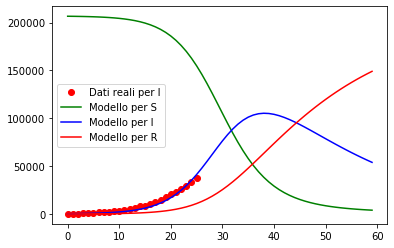

In [83]:
intervallo = np.arange(60)
y = SIR(N0, serie_I, serie_R, intervallo)
plt.plot(intervallo[:len(serie_I)], serie_I, 'ro', label="Dati reali per I")
plt.plot(intervallo, y[:,0], "g", label="Modello per S")
plt.plot(intervallo, y[:,1], "b", label="Modello per I")
plt.plot(intervallo, y[:,2], "r", label="Modello per R")
plt.legend()

Il modello suggerisce che il picco di infezioni si raggiungerà all'incirca 35 giorni dopo la prima rilevazione della nostra serie storica, e l'infezione comprenderà grosso modo la metà del campione di popolazione. Questo andamento qualitativo non cambia alterando il valore di $N_0$, per esempio se lo portiamo a un milione troviamo che

beta ottimale = 0.2659206362755552
gamma ottimale = 0.05234684582532106
sigma ottimale = 5.079974391636122


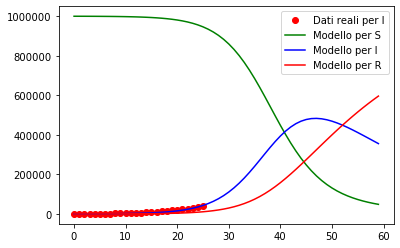

In [84]:
N0 = 1000000
serie_I = np.array([misura["totale_attualmente_positivi"] for misura in DATA])
serie_R = np.array([misura["dimessi_guariti"] + misura["deceduti"] for misura in DATA])

# Ora disegna la soluzione per i valori ottimali ottimale
intervallo = np.arange(60)
y = SIR(N0, serie_I, serie_R, intervallo)
plt.plot(intervallo[:len(serie_I)], serie_I, 'ro', label="Dati reali per I")
plt.plot(intervallo, y[:,0], "g", label="Modello per S")
plt.plot(intervallo, y[:,1], "b", label="Modello per I")
plt.plot(intervallo, y[:,2], "r", label="Modello per R")
plt.legend()

### Ottimizzare, ottimizzare, ottimizzare...

I risultati che abbiamo ottenuti sono interessanti, qualitativamente sensati, ma non possiamo basarci su di essi per sbilanciarci in previsioni (anche se c'è chi lo fa usando modelli molto più semplici)...

Piuttosto possiamo provare a validare il modello usando i dati della serie storica e dividendoli in due tronconi, di lunghezza uguale: la prima parte della serie sarà usata per calibrare $\beta$ e $\gamma$ come abbiamo fatto fin qui, le seconda per ottimizzare rispetto a $N_0$, che resta il punto di maggiore arbitrio di tutti questi nostri ragionamenti.

Quel che faremo è questo: supponiamo che $(I_0,R_0), ..., (I_{m-1},R_{m-1}),(I_{m},R_{m}),...,(I_n,R_n)$ sia la nostra serie, divisa in due parti: i primi $m$ valori (la testa della serie) e i valori dall'$(m+1)$-esimo all'$(n+1)$-esimo (la coda della serie); occhio che la serie parte dal valore "zeresimo".

Fissiamo un valore $N_0$ iniziale e calibriamo i parametri $\beta$ e $\gamma$ usando i valori della coda della serie storica. Otteniamo una soluzione ottimale $(S(t),I(t),R(t))$ del modello.

Abbiamo quindi una funzione $F(N_0)=(S(t),I(t),R(t))$ che a un valore di $N_0$ associa le tre curve calibrate sulla coda dei dati storici: ottimizziamo ora $F(N_0)$ rispetto alla testa dei dati storici, ottenendo un valore $N_1$. Questo dovrebbe essere la numerosità della popolazione "che il modello ritiene essere quella giusta".

Infine valutiamo il modello sui $\beta$, $\gamma$ e $N_1$ ottenuti da questa coppia di ottimizzazioni e tracciamo i relativi grafici.

N ottimale = [229528.77600988]
beta ottimale = 0.2721620234818365
gamma ottimale = 0.05001218337026027
sigma ottimale = 5.441914452462749


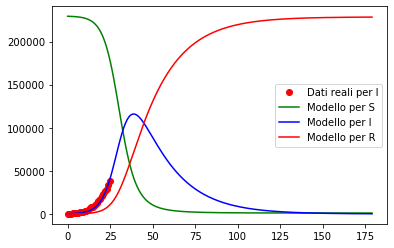

In [85]:
N0 = max(i["tamponi"] for i in DATA)   # Valore iniziale di N0: ultimo valore del numero dei tamponi
serie_I = np.array([misura["totale_attualmente_positivi"] for misura in DATA])
serie_R = np.array([misura["dimessi_guariti"] + misura["deceduti"] for misura in DATA])

m = len(serie_I) // 2      # intero
testa_I = serie_I[:m+1]
coda_I = serie_I[m:]
testa_R = serie_R[:m+1]
coda_R = serie_R[m:]
intervallo = np.arange(len(serie_I))
testa_intervallo = np.arange(m+1)
coda_intervallo = np.arange(m, len(serie_I))

coda_SIR = np.array([[N0 - coda_I[i] - coda_R[i], coda_I[i], coda_R[i]] for i in range(len(coda_intervallo))])
testa_SIR = np.array([[N0 - testa_I[i] - testa_R[i], testa_I[i], testa_R[i]] for i in range(len(testa_intervallo))])

def F(N):
    y = SIR(N, coda_I, coda_R, testa_intervallo, False)
    return np.linalg.norm(y - testa_SIR)

# Trova il valore ottimale di beta e gamma
N_ottimale = fmin(F, N0, disp = False)
print("N ottimale =", N_ottimale)

# Ora disegna la soluzione per i valori ottimali ottimale
intervallo = np.arange(180)
y = SIR(N_ottimale, serie_I, serie_R, intervallo)
plt.plot(intervallo[:len(serie_I)], serie_I, 'ro', label="Dati reali per I")
plt.plot(intervallo, y[:,0], "g", label="Modello per S")
plt.plot(intervallo, y[:,1], "b", label="Modello per I")
plt.plot(intervallo, y[:,2], "r", label="Modello per R")
plt.legend()

Come si vede, in questo caso l'andamento qualitativo è analogo ai precedenti, ma stavolta il modello offre una stima anche della numerosità della popolazione per cui questi dati hanno senso.

## Relativizzare il modello

I principali grattacapi del nostro modello sono stati dovuti alla difficoltà di stimare $N$, la numerosità della popolazione. Possiamo provare a relativizzare le variabili del nostro modello, normalizzandole rispetto a $N$ e trasformandone, in un certo senso, in percentuali, semplicemente ponendo

$$
    s = \frac SN, \quad i = \frac IN, \quad r = \frac RN
$$

Prendiamo per esempio l'equazione per $S'$ del modello **SIR**, $S'=-\beta IS/N$: ricordando la regola di derivazione del quoziente e supponendo che $N'=0$, abbiamo che

$$
    s' = \left(\frac SN\right)' = \frac{S'N-SN'}{N^2}
        = \frac {S'}{N}
        = -\beta is
$$

Analogamente troviamo che

$$
    i' = \left(\frac IN\right)' = \frac{I'N-IN'}{N^2}
        = \frac{I'}{N}
        = \beta \frac{IS}{N^2} - \gamma \frac{I}{N}
        = \beta is - \gamma i
$$

e

$$
    r' = \left(\frac RN\right)' = \frac{R'N-RN'}{N^2}
        = \frac{R'}{N}
        = \gamma \frac IN
        = \gamma i
$$

Il nostro modello è ora privo di riferimenti alla numerosità della popolazione e si legge come

$$
    \begin{cases}
        s' = -\beta is  \\
        i' = \beta is -\gamma i \\
        r' = \gamma i
    \end{cases}
$$

Possiamo usare la stessa funzione SIR definita in precedenza cui forniamo come $N_0$ il valore 1, e avendo l'accortezza di normalizzare le serie per $I$ e $R$:

beta ottimale = 0.08356738598386595
gamma ottimale = 0.016819197188227997
sigma ottimale = 4.968571629706322


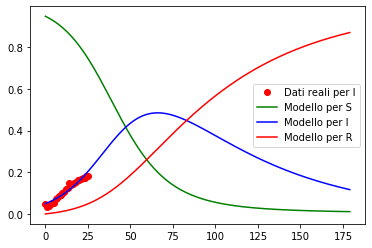

In [86]:
N0 = 1
serie_I = np.array([misura["totale_attualmente_positivi"]/misura["tamponi"] for misura in DATA])
serie_R = np.array([(misura["dimessi_guariti"] + misura["deceduti"])/misura["tamponi"] for misura in DATA])

# Ora disegna la soluzione per i valori ottimali ottimale
intervallo = np.arange(180)
y = SIR(N0, serie_I, serie_R, intervallo)
plt.plot(intervallo[:len(serie_I)], serie_I, 'ro', label="Dati reali per I")
plt.plot(intervallo, y[:,0], "g", label="Modello per S")
plt.plot(intervallo, y[:,1], "b", label="Modello per I")
plt.plot(intervallo, y[:,2], "r", label="Modello per R")
plt.legend()

Da questi grafici vediamo chiaramente che si attende il picco delle infezioni a circa 60 giorni dall'inizio della rilevazione dei dati (se questo calcolo fosse realistico staremmo parlando di fine aprile), e con una incidenza di oltre il 50% della popolazione.

Qualitativamente, l'andamento delle curve è quello tipico dei modelli **SIR** per le epidemie virali.

### Modelli erranti

Le curve che abbiamo ottenuto offrono una estrapolazione dai dati correnti sulla base dei modelli che abbiamo utilizzato, in particolare il **SIR**. Ma quanto sono affidabili questi modelli nel caso in esame? In teoria per saperlo con certezza dovremmo avere tutta la serie storica, in modo da vedere *ex-post* quanto bene il modello funziona nel modellizzare i dati reali. Ma i modelli, inutile nasconderselo, sono fatti per prevedere *ex-ante*...

Non facciamo niente di male a verificare, sulla base della serie attuale, quanto il modello che abbiamo messo in piedi è effettivamente affidabile: nuovamente segmentiamo i dati in due tronconi, usando il primo troncone per la calibrazione e il secondo per la verifica.

In pratica calibreremo il modello e poi andremo a calcolare l'errore commesso nell'usarlo sul secondo troncone della serie, calcolando magari in qualche modo la sua affidabilità.

Facciamolo usando l'ultima versione del modello, quella in cui modellizziamo le percentuali dei compartimenti e non i numeri precisi:

beta ottimale = 0.09022740306039385
gamma ottimale = 0.016981267979141474
sigma ottimale = 5.3133489896762995
beta ottimale = 0.08356738598386595
gamma ottimale = 0.016819197188227997
sigma ottimale = 4.968571629706322


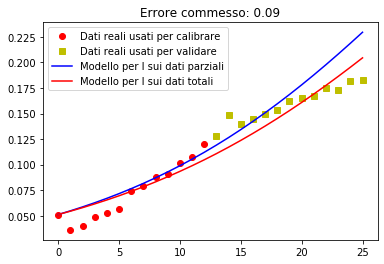

In [87]:
N0 = 1
serie_I = np.array([misura["totale_attualmente_positivi"]/misura["tamponi"] for misura in DATA])
serie_R = np.array([(misura["dimessi_guariti"] + misura["deceduti"])/misura["tamponi"] for misura in DATA])

# I valori della serie di indici < limite sono quelli per calibrare, gli altri per verificare
lunghezza = len(serie_I)
limite = lunghezza // 2    # intero

# Applichiamo il modello calibrandolo sui dati della prima parte della serie storica
# e poi sui dati di tutta la serie
intervallo = np.arange(lunghezza)
y_parziale = SIR(N0, serie_I[:limite], serie_R[:limite], intervallo)
y = SIR(N0, serie_I, serie_R, intervallo)

## Calcoliamo l'errore commesso sui dati della seconda parte della serie storica
#errore = np.linalg.norm(y[limite:lunghezza, 1] - serie_I[limite:lunghezza])

# Calcoliamo l'errore commesso sui tutti i dati della serie storica
errore = np.linalg.norm(y_parziale[:, 1] - serie_I)

# Ora disegna un grafico di come la curva calibrata approssima i dati
plt.plot(intervallo[:limite], serie_I[:limite], 'ro', label="Dati reali usati per calibrare")
plt.plot(intervallo[limite:lunghezza], serie_I[limite:lunghezza], 'ys', label="Dati reali usati per validare")
plt.plot(intervallo, y_parziale[:,1], "b", label="Modello per I sui dati parziali")
plt.plot(intervallo, y[:,1], "r", label="Modello per I sui dati totali")
plt.title(f"Errore commesso: {errore:.2f}")
plt.legend()

Come si vede l'errore è letteralmente macroscopico! Infatti abbiamo un errore nell'ordine di grandezza del valore iniziale per $I$!!!

La curva blu, quella calibrata sui dati parziali, e quella rossa, sui dati totali, mostrano lo stesso andamento ma valori leggermente diversi: apprezziamone le differenze disegnandole su un intervallo di 180:

beta ottimale = 0.09022740306039385
gamma ottimale = 0.016981267979141474
sigma ottimale = 5.3133489896762995
beta ottimale = 0.08356738598386595
gamma ottimale = 0.016819197188227997
sigma ottimale = 4.968571629706322


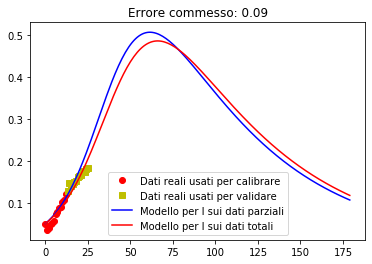

In [88]:
N0 = 1
serie_I = np.array([misura["totale_attualmente_positivi"]/misura["tamponi"] for misura in DATA])
serie_R = np.array([(misura["dimessi_guariti"] + misura["deceduti"])/misura["tamponi"] for misura in DATA])

# I valori della serie di indici < limite sono quelli per calibrare, gli altri per verificare
lunghezza = len(serie_I)
limite = lunghezza // 2    # intero

# Applichiamo il modello calibrandolo sui dati della prima parte della serie storica
# e poi sui dati di tutta la serie
intervallo = np.arange(180)
y_parziale = SIR(N0, serie_I[:limite], serie_R[:limite], intervallo)
y = SIR(N0, serie_I, serie_R, intervallo)

## Calcoliamo l'errore commesso sui dati della seconda parte della serie storica
#errore = np.linalg.norm(y[limite:lunghezza, 1] - serie_I[limite:lunghezza])

# Calcoliamo l'errore commesso sui tutti i dati della serie storica
errore = np.linalg.norm(y_parziale[:lunghezza, 1] - serie_I)

# Ora disegna un grafico di come la curva calibrata approssima i dati
plt.plot(intervallo[:limite], serie_I[:limite], 'ro', label="Dati reali usati per calibrare")
plt.plot(intervallo[limite:lunghezza], serie_I[limite:lunghezza], 'ys', label="Dati reali usati per validare")
plt.plot(intervallo, y_parziale[:,1], "b", label="Modello per I sui dati parziali")
plt.plot(intervallo, y[:,1], "r", label="Modello per I sui dati totali")
plt.title(f"Errore commesso: {errore:.2f}")
plt.legend()

Tuttavia: ha senso fidarsi di un modello con un errore dello stesso ordine di grandezza dei dati iniziali?

Ma non è tutto: proviamo a rifare il conto eliminando il primo termine della serie, apparentemente una variazione da poco, come se avessimo iniziato a rilevare i dati con un giorno di ritardo... ecco il risultato:

beta ottimale = 0.14993411722068758
gamma ottimale = 0.025171778726624374
sigma ottimale = 5.956437121469734
beta ottimale = 0.11096974354728331
gamma ottimale = 0.02211375824529885
sigma ottimale = 5.0181313513669386


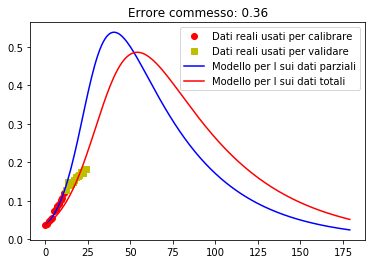

In [89]:
N0 = 1
serie_I = np.array([misura["totale_attualmente_positivi"]/misura["tamponi"] for misura in DATA])
serie_R = np.array([(misura["dimessi_guariti"] + misura["deceduti"])/misura["tamponi"] for misura in DATA])

serie_I = serie_I[1:]
serie_R = serie_R[1:]

# I valori della serie di indici < limite sono quelli per calibrare, gli altri per verificare
lunghezza = len(serie_I)
limite = lunghezza // 2    # intero

# Applichiamo il modello calibrandolo sui dati della prima parte della serie storica
# e poi sui dati di tutta la serie
intervallo = np.arange(180)
y_parziale = SIR(N0, serie_I[:limite], serie_R[:limite], intervallo)
y = SIR(N0, serie_I, serie_R, intervallo)

## Calcoliamo l'errore commesso sui dati della seconda parte della serie storica
#errore = np.linalg.norm(y[limite:lunghezza, 1] - serie_I[limite:lunghezza])

# Calcoliamo l'errore commesso sui tutti i dati della serie storica
errore = np.linalg.norm(y_parziale[:lunghezza, 1] - serie_I)

# Ora disegna un grafico di come la curva calibrata approssima i dati
plt.plot(intervallo[:limite], serie_I[:limite], 'ro', label="Dati reali usati per calibrare")
plt.plot(intervallo[limite:lunghezza], serie_I[limite:lunghezza], 'ys', label="Dati reali usati per validare")
plt.plot(intervallo, y_parziale[:,1], "b", label="Modello per I sui dati parziali")
plt.plot(intervallo, y[:,1], "r", label="Modello per I sui dati totali")
plt.title(f"Errore commesso: {errore:.2f}")
plt.legend()

L'errore è aumentato sensibilmente, e anche la differenza fra le due curve, che si accentua: quella calibrata sui dati parziali fa aumentare il numero di infetti ma ravvicinare il picco, l'altra diminuisce il numero di infetti e allontana il picco, il comportamento che si vuole in questi casi per non congestionare i sistemi sanitari.

Il tutto cambiando un solo dato, perdendo una sola osservazione... Se invece avessimo solo la seconda parte dei dati, quelli in giallo nella figura, allora il risultato sarebbe il seguente:

beta ottimale = 0.05655955283854011
gamma ottimale = 0.013555921579358974
sigma ottimale = 4.172313369285121


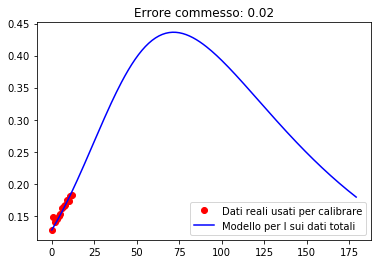

In [90]:
N0 = 1
serie_I = np.array([misura["totale_attualmente_positivi"]/misura["tamponi"] for misura in DATA])
serie_R = np.array([(misura["dimessi_guariti"] + misura["deceduti"])/misura["tamponi"] for misura in DATA])

# I valori della serie di indici < limite sono quelli per calibrare, gli altri per verificare
lunghezza = len(serie_I)
limite = lunghezza // 2    # intero

serie_I = serie_I[limite:]
serie_R = serie_R[limite:]
lunghezza = len(serie_I)

# Applichiamo il modello calibrandolo sui dati della seconda parte della serie storica
intervallo = np.arange(180)
y = SIR(N0, serie_I, serie_R, intervallo)

# Calcoliamo l'errore commesso sui tutti i dati della serie storica
errore = np.linalg.norm(y[:lunghezza, 1] - serie_I)

# Ora disegna un grafico di come la curva calibrata approssima i dati
plt.plot(intervallo[:lunghezza], serie_I[:lunghezza], 'ro', label="Dati reali usati per calibrare")
plt.plot(intervallo, y[:,1], "b", label="Modello per I sui dati totali")
plt.title(f"Errore commesso: {errore:.2f}")
plt.legend()

## Conclusioni

Non è lo scopo di questa breve nota quello di proporre un modello predittivo per le epidemie, né tantomeno predire alcunché riguardo l'attuale Covid19.

Piuttosto lo scopo è stato mostrare:

1. come i modelli matematici siano di complessità incrementale, e crescente e come operino delle ipotesi comunque semplicistiche sulla natura delle cose; le ipotesi devono sempre essere indotte dal dominio specifico di applicazione del modello.
2. che i modelli hanno dei limiti di applicabilità e che nell'applicare il modello stesso si operano delle scelte, dettate dalla semplicità, dagli strumenti a disposizione, etc.;
3. che bisogna sempre provare a mettere alla prova il proprio modello e stimare l'ordine di grandezza dell'errore prima di fare predizioni.
4. che sebbene il modello teorico possa avere una dipendenza continua dai dati, in realtà il processo di calibrazione del modello sulla base dei dati disponibili è molto sensibile alle serie storiche che si usano, e basta un singolo valore un più o meno per cambiare la predizione del modello...
5. che alla fine oggi è molto facile programmare un modello, rappresentare i risultati in forma grafica e giocare con i parametri dai quali il modello dipende: ma che bisogna prima partire dal modello, poi dal programma che lo implementa, e non cambiare il modello al primo dato difforme o problematico.

In particolare, molti lettori di queste note avranno immediatamente visto un migliore uso del modello che ho proposto, o una sua modifica per renderlo più efficiente, o reperire più dati per calibrarlo meglio, etc. etc.

Ma se il messaggio che non basta esporre una tabella o un grafico per stabilire alcunché su un fenomeno complesso come une epidemia è passato, lo scopo di questa breve nota (oltre al divertimento nello scriverla) sarà stato raggiunto.

## Per saperne di più
Per chi fosse interessato ad approfondire queste tematiche, come primo riferimento in italiano per la parte teorica di questo affascinante argomento suggerisco l'ultimo capitolo del manuale di Mascia-Montefusco *Un invito alla biomatematica*, LaDotta, 2015.

Un testo semplice e accessibile che offre una introduzione alla matematica delle malattie infettive ma anche una panoramica dei metodi di stima parametrica necessari per "incrociarli" con i dati reali è il recente libro di Li *An Introduction to Mathematical Modeling of Infectious Diseases* Springer, 2018.

A livello più avanzato trovo ancora illuminante e assolutamente consigliabile la trattazione matematica di Hethcote *The Mathematics of Infectious Diseases* SIAM Review, 42 (2000), 599-653.
